In [20]:
import pandas as pd
data=pd.read_csv('Airlinewise Monthly International Air Traffic To And From The Indian Territory (1).csv')

In [21]:
data.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581,116600,0.000,NaN
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882,42468,0.000,115.680


In [22]:
data

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581,116600,0.000,NaN
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882,42468,0.000,115.680
...,...,...,...,...,...,...,...,...,...
2329,2017,MAR,Q1,UNITED PARCEL SERVICES,FOREIGN,0,0,646.800,433.100
2330,2017,MAR,Q1,US BANGLA AIRLINES,FOREIGN,4597,4595,0.000,0.000
2331,2017,MAR,Q1,UZBEKISTAN AIRWAYS,FOREIGN,4311,5048,386.300,494.900
2332,2017,MAR,Q1,VIRGIN ATLANTIC AIRLINES,FOREIGN,7131,7810,236.700,513.800


In [23]:
data.columns

Index(['YEAR', 'MONTH', 'QUARTER', 'AIRLINE NAME', 'CARRIER TYPE',
       'PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA', 'FREIGHT TO INDIA',
       'FREIGHT FROM INDIA'],
      dtype='object')

In [24]:
data['CARRIER TYPE'].value_counts()

CARRIER TYPE
FOREIGN     2199
DOMESTIC     135
Name: count, dtype: int64

In [25]:
df=data

In [26]:
# Convert 'PASSENGERS TO INDIA' to numeric, coercing errors to NaN
df['PASSENGERS TO INDIA'] = pd.to_numeric(df['PASSENGERS TO INDIA'], errors='coerce')

In [27]:
# Create a new column for total passenger volume
df['TOTAL PASSENGERS'] = df['PASSENGERS TO INDIA'] + df['PASSENGERS FROM INDIA']

df.drop(columns=['PASSENGERS TO INDIA','PASSENGERS FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA'],axis=1,inplace=True)


In [28]:
df

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,TOTAL PASSENGERS
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,80350.0
...,...,...,...,...,...,...
2329,2017,MAR,Q1,UNITED PARCEL SERVICES,FOREIGN,0.0
2330,2017,MAR,Q1,US BANGLA AIRLINES,FOREIGN,9192.0
2331,2017,MAR,Q1,UZBEKISTAN AIRWAYS,FOREIGN,9359.0
2332,2017,MAR,Q1,VIRGIN ATLANTIC AIRLINES,FOREIGN,14941.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              2334 non-null   int64  
 1   MONTH             2334 non-null   object 
 2   QUARTER           2334 non-null   object 
 3   AIRLINE NAME      2334 non-null   object 
 4   CARRIER TYPE      2334 non-null   object 
 5   TOTAL PASSENGERS  2329 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 109.5+ KB


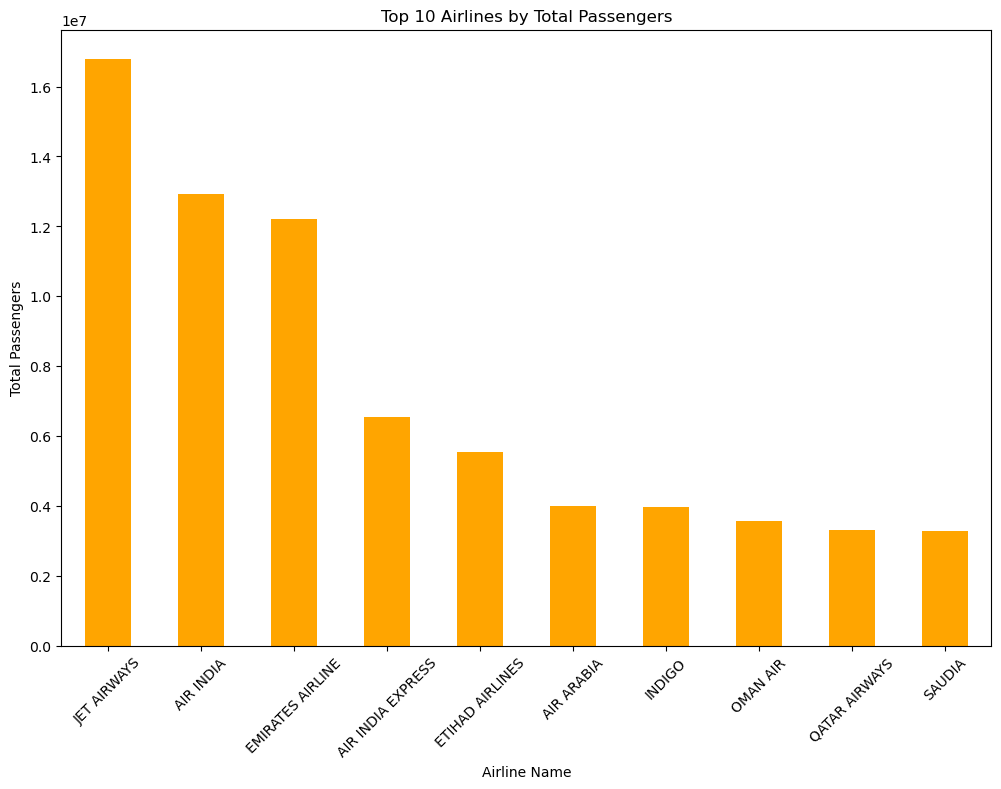

In [50]:
# Reverse the airline_mapping dictionary
reverse_airline_mapping = {v: k for k, v in airline_mapping.items()}

# Replace encoded airline names with actual names
df['AIRLINE NAME'] = df['AIRLINE NAME'].map(reverse_airline_mapping)

# Group data by airline and sum the total passengers
passengers_by_airline = df.groupby('AIRLINE NAME')['TOTAL PASSENGERS'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
passengers_by_airline.head(10).plot(kind='bar', color='orange')  # Display top 10 airlines
plt.title('Top 10 Airlines by Total Passengers')
plt.xlabel('Airline Name')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,TOTAL PASSENGERS
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,533096.0
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,212181.0
2,2015,JAN,Q1,INDIGO,DOMESTIC,142324.0
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,652969.0
4,2015,JAN,Q1,SPICEJET,DOMESTIC,80350.0


In [31]:
df['QUARTER']=df['QUARTER'].map({'Q1':1,'Q2':2,'Q3':3,'Q4':4})
df['MONTH']=df['MONTH'].map({'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})
df['CARRIER TYPE']=df['CARRIER TYPE'].map({'DOMESTIC':1,'INTERNATIONAL':2})

In [32]:
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,TOTAL PASSENGERS
0,2015,1,1,AIR INDIA,1.0,533096.0
1,2015,1,1,AIR INDIA EXPRESS,1.0,212181.0
2,2015,1,1,INDIGO,1.0,142324.0
3,2015,1,1,JET AIRWAYS,1.0,652969.0
4,2015,1,1,SPICEJET,1.0,80350.0


In [33]:
df['AIRLINE NAME'].value_counts()

AIRLINE NAME
AIR INDIA                     27
GULF AIR                      27
OMAN AIR                      27
NEPAL AIRLINES CORPORATION    27
MYANMAR AIRLINES              27
                              ..
MARTIN AIR HOLLAND             3
SOUTHA AFRICAN AIRLINES        3
BRUSSELS AIRLINES              3
GARUDA INDONESIA               3
US BANGLA AIRLINES             3
Name: count, Length: 100, dtype: int64

In [34]:
# prompt: do label encoding on the column AIRLINE NAME and let me know the values you rassigning for i t

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['AIRLINE NAME'] = le.fit_transform(df['AIRLINE NAME'])

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'AEROFLOT': 0, 'AEROLOGIC': 1, 'AIR ARABIA': 2, 'AIR ASIA BERHAD': 3, 'AIR ASIA X': 4, 'AIR ASTANA': 5, 'AIR AUSTRAL': 6, 'AIR CANADA': 7, 'AIR CHINA': 8, 'AIR FRANCE': 9, 'AIR INDIA': 10, 'AIR INDIA EXPRESS': 11, 'AIR MANAS': 12, 'AIR MAURITIUS': 13, 'AIR SEYCHELLES': 14, 'ALL NIPPON AIRWAYS': 15, 'ARIANA AFGHAN': 16, 'ASIANA AIRLINES': 17, 'AUSTRIAN AIRLINES': 18, 'BANGKOK AIRWAYS': 19, 'BHUTAN AIRLINES': 20, 'BIMAN BANGLADESH': 21, 'BRITISH AIRWAYS': 22, 'BRUSSELS AIRLINES': 23, 'BUDDHA AIR': 24, 'BUDHHA AIR': 25, 'CARGOLUX AIRLINES INTERNATIONAL S.A.': 26, 'CATHAY PACIFIC': 27, 'CHINA AIRLINES LTD': 28, 'CHINA EASTERN AIRLINES': 29, 'CHINA SOUTHERN ': 30, 'DELTA AIRLINES': 31, 'DRAGON AIR': 32, 'DRUK AIR': 33, 'EGYPT AIR': 34, 'EL-AL-ISRAEL': 35, 'EMIRATES AIRLINE': 36, 'ETHIOPIAN AIRLINES': 37, 'ETIHAD AIRLINES': 38, 'EVA AIRWAYS': 39, 'FEDERAL EXPRESS': 40, 'FINN AIR': 41, 'FLY DUBAI': 42, 'GARUDA INDONESIA': 43, 'GULF AIR': 44, 'INDIGO': 45, 'IRAN AIR': 46, 'IRAQI AIRWAYS': 47,

In [35]:
df.isnull().sum()

YEAR                   0
MONTH                  0
QUARTER                0
AIRLINE NAME           0
CARRIER TYPE        2199
TOTAL PASSENGERS       5
dtype: int64

In [36]:
# prompt: fill null values with mode for carrier type column with mean for total passengers

# Fill null values in 'CARRIER TYPE' with the mode
df['CARRIER TYPE'] = df['CARRIER TYPE'].fillna(df['CARRIER TYPE'].mode()[0])

# Fill null values in 'TOTAL PASSENGERS' with the mean
df['TOTAL PASSENGERS'] = df['TOTAL PASSENGERS'].fillna(df['TOTAL PASSENGERS'].mean())

df.isnull().sum()


YEAR                0
MONTH               0
QUARTER             0
AIRLINE NAME        0
CARRIER TYPE        0
TOTAL PASSENGERS    0
dtype: int64

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
from sklearn.metrics import r2_score

In [38]:
X=df.drop(columns=['TOTAL PASSENGERS','CARRIER TYPE'])
y=df['TOTAL PASSENGERS']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1867, 4)
X_test shape: (467, 4)
y_train shape: (1867,)
y_test shape: (467,)


In [39]:
# Train a RandomForestRegressor model and evaluate its performance
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using R-squared
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared score (RandomForestRegressor): {r2_rf}")

R-squared score (RandomForestRegressor): 0.9872026831415716


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 4026.1363457127018
Mean Squared Error (MSE): 103177103.59523617
Root Mean Squared Error (RMSE): 10157.613085525367


In [41]:
# Calculate MAPE for Random Forest
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) for Random Forest: {mape_rf:.2f}%")

Mean Absolute Percentage Error (MAPE) for Random Forest: inf%


In [42]:
X.columns

Index(['YEAR', 'MONTH', 'QUARTER', 'AIRLINE NAME'], dtype='object')

In [43]:
import joblib

# Save the trained RandomForestRegressor model to a file
joblib.dump(rf_model, "model.pkl")
print("Model saved as model.pkl")

Model saved as model.pkl


In [44]:
import gradio as gr
import pandas as pd
import joblib  # or use pickle
from sklearn.ensemble import RandomForestRegressor

# Load your trained regression model
model = joblib.load("model.pkl")

# Define mappings
airline_mapping = {
    'AEROFLOT': 0, 'AEROLOGIC': 1, 'AIR ARABIA': 2, 'AIR ASIA BERHAD': 3, 'AIR ASIA X': 4,
    'AIR ASTANA': 5, 'AIR AUSTRAL': 6, 'AIR CANADA': 7, 'AIR CHINA': 8, 'AIR FRANCE': 9,
    'AIR INDIA': 10, 'AIR INDIA EXPRESS': 11, 'AIR MANAS': 12, 'AIR MAURITIUS': 13,
    'AIR SEYCHELLES': 14, 'ALL NIPPON AIRWAYS': 15, 'ARIANA AFGHAN': 16, 'ASIANA AIRLINES': 17,
    'AUSTRIAN AIRLINES': 18, 'BANGKOK AIRWAYS': 19, 'BHUTAN AIRLINES': 20, 'BIMAN BANGLADESH': 21,
    'BRITISH AIRWAYS': 22, 'BRUSSELS AIRLINES': 23, 'BUDDHA AIR': 24, 'BUDHHA AIR': 25,
    'CARGOLUX AIRLINES INTERNATIONAL S.A.': 26, 'CATHAY PACIFIC': 27, 'CHINA AIRLINES LTD': 28,
    'CHINA EASTERN AIRLINES': 29, 'CHINA SOUTHERN ': 30, 'DELTA AIRLINES': 31, 'DRAGON AIR': 32,
    'DRUK AIR': 33, 'EGYPT AIR': 34, 'EL-AL-ISRAEL': 35, 'EMIRATES AIRLINE': 36,
    'ETHIOPIAN AIRLINES': 37, 'ETIHAD AIRLINES': 38, 'EVA AIRWAYS': 39, 'FEDERAL EXPRESS': 40,
    'FINN AIR': 41, 'FLY DUBAI': 42, 'GARUDA INDONESIA': 43, 'GULF AIR': 44, 'INDIGO': 45,
    'IRAN AIR': 46, 'IRAQI AIRWAYS': 47, 'ISLAND AVIATION SERVICES': 48, 'JAPAN AIRLINES': 49,
    'JET AIRWAYS': 50, 'KALITTA AIR': 51, 'KAM AIR': 52, 'KENYA AIRWAYS': 53, 'KLM AIRLINES': 54,
    'KOREAN AIR': 55, 'KUWAIT AIRWAYS': 56, 'LUFTHANSA': 57, 'MAHAN AIR': 58, 'MALAYSIA AIRLINES': 59,
    'MALINDO AIRWAYS': 60, 'MARTIN AIR HOLLAND': 61, 'MEGA MALDIVES AIRLINES': 62,
    'MIHIN LANKA': 63, 'MYANMAR AIRLINES': 64, 'NEPAL AIRLINES CORPORATION': 65,
    'NOVO AIR': 66, 'OMAN AIR': 67, 'PAK INTERNATIONAL': 68, 'QATAR AIRWATYS': 69,
    'QATAR AIRWAYS': 70, 'REGENT AIRWAYS': 71, 'ROSSIYA AIRLINES': 72, 'SAFI AIRWAYS': 73,
    'SAUDIA': 74, 'SCAT AIRLINES': 75, 'SCOOT PTE LTD.': 76, 'SHANDONG AIRLINES': 77,
    'SILK AIR': 78, 'SINGAPORE AIRLINES': 79, 'SOUTHA AFRICAN AIRLINES': 80, 'SPICEJET': 81,
    'SRILNKAN AIRWAYS': 82, 'SWISS AIR': 83, 'TAJIK AIR': 84, 'THAI AIR ASIA': 85,
    'THAI AIRWAYS': 86, 'THAI SMILE AIRWAYS': 87, 'THOMAS COOK AIRLINES U.K.': 88,
    'TIGER AIRWAYS': 89, 'TRANSAERO AIRLINES': 90, 'TURKISH AIRLINES': 91,
    'TURKMENISTAN AIRLINES': 92, 'UNITED AIRLINES': 93, 'UNITED AIRLINES BANGLADESH LTD.': 94,
    'UNITED PARCEL SERVICES': 95, 'US BANGLA AIRLINES': 96, 'UZBEKISTAN AIRWAYS': 97,
    'VIRGIN ATLANTIC AIRLINES': 98, 'YEMENIA AIRWAYS': 99
}


# Prediction function
def predict_passengers(year, month, quarter, airline_name):
    input_data = pd.DataFrame([{
        'YEAR': int(year),
        'MONTH': int(month),
        'QUARTER': int(quarter),
        'AIRLINE NAME': airline_mapping[airline_name]
    }])

    prediction = model.predict(input_data)[0]
    return f"Estimated Passengers: {prediction:,.0f}"

# Gradio interface
gr.Interface(
    fn=predict_passengers,
    inputs=[
        gr.Number(label="Year", value=2023),
        gr.Slider(label="Month",minimum=1,maximum=3,step=1, value=1),
        gr.Slider(label="Quarter",minimum=1,maximum=4,step=1, value=1),
        gr.Dropdown(label="Airline Name", choices=list(airline_mapping.keys())),
    ],
    outputs="text",
    title="Air Passenger Volume Estimator",
    description="Enter airline and time details to estimate total passengers for that period."
).launch(inbrowser=True)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [45]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load your trained regression model
model = joblib.load("model.pkl")

# Define airline mapping
airline_mapping = {
    'AEROFLOT': 0, 'AEROLOGIC': 1, 'AIR ARABIA': 2, 'AIR ASIA BERHAD': 3, 'AIR ASIA X': 4,
    'AIR ASTANA': 5, 'AIR AUSTRAL': 6, 'AIR CANADA': 7, 'AIR CHINA': 8, 'AIR FRANCE': 9,
    'AIR INDIA': 10, 'AIR INDIA EXPRESS': 11, 'AIR MANAS': 12, 'AIR MAURITIUS': 13,
    'AIR SEYCHELLES': 14, 'ALL NIPPON AIRWAYS': 15, 'ARIANA AFGHAN': 16, 'ASIANA AIRLINES': 17,
    'AUSTRIAN AIRLINES': 18, 'BANGKOK AIRWAYS': 19, 'BHUTAN AIRLINES': 20, 'BIMAN BANGLADESH': 21,
    'BRITISH AIRWAYS': 22, 'BRUSSELS AIRLINES': 23, 'BUDDHA AIR': 24, 'BUDHHA AIR': 25,
    'CARGOLUX AIRLINES INTERNATIONAL S.A.': 26, 'CATHAY PACIFIC': 27, 'CHINA AIRLINES LTD': 28,
    'CHINA EASTERN AIRLINES': 29, 'CHINA SOUTHERN ': 30, 'DELTA AIRLINES': 31, 'DRAGON AIR': 32,
    'DRUK AIR': 33, 'EGYPT AIR': 34, 'EL-AL-ISRAEL': 35, 'EMIRATES AIRLINE': 36,
    'ETHIOPIAN AIRLINES': 37, 'ETIHAD AIRLINES': 38, 'EVA AIRWAYS': 39, 'FEDERAL EXPRESS': 40,
    'FINN AIR': 41, 'FLY DUBAI': 42, 'GARUDA INDONESIA': 43, 'GULF AIR': 44, 'INDIGO': 45,
    'IRAN AIR': 46, 'IRAQI AIRWAYS': 47, 'ISLAND AVIATION SERVICES': 48, 'JAPAN AIRLINES': 49,
    'JET AIRWAYS': 50, 'KALITTA AIR': 51, 'KAM AIR': 52, 'KENYA AIRWAYS': 53, 'KLM AIRLINES': 54,
    'KOREAN AIR': 55, 'KUWAIT AIRWAYS': 56, 'LUFTHANSA': 57, 'MAHAN AIR': 58, 'MALAYSIA AIRLINES': 59,
    'MALINDO AIRWAYS': 60, 'MARTIN AIR HOLLAND': 61, 'MEGA MALDIVES AIRLINES': 62,
    'MIHIN LANKA': 63, 'MYANMAR AIRLINES': 64, 'NEPAL AIRLINES CORPORATION': 65,
    'NOVO AIR': 66, 'OMAN AIR': 67, 'PAK INTERNATIONAL': 68, 'QATAR AIRWATYS': 69,
    'QATAR AIRWAYS': 70, 'REGENT AIRWAYS': 71, 'ROSSIYA AIRLINES': 72, 'SAFI AIRWAYS': 73,
    'SAUDIA': 74, 'SCAT AIRLINES': 75, 'SCOOT PTE LTD.': 76, 'SHANDONG AIRLINES': 77,
    'SILK AIR': 78, 'SINGAPORE AIRLINES': 79, 'SOUTHA AFRICAN AIRLINES': 80, 'SPICEJET': 81,
    'SRILNKAN AIRWAYS': 82, 'SWISS AIR': 83, 'TAJIK AIR': 84, 'THAI AIR ASIA': 85,
    'THAI AIRWAYS': 86, 'THAI SMILE AIRWAYS': 87, 'THOMAS COOK AIRLINES U.K.': 88,
    'TIGER AIRWAYS': 89, 'TRANSAERO AIRLINES': 90, 'TURKISH AIRLINES': 91,
    'TURKMENISTAN AIRLINES': 92, 'UNITED AIRLINES': 93, 'UNITED AIRLINES BANGLADESH LTD.': 94,
    'UNITED PARCEL SERVICES': 95, 'US BANGLA AIRLINES': 96, 'UZBEKISTAN AIRWAYS': 97,
    'VIRGIN ATLANTIC AIRLINES': 98, 'YEMENIA AIRWAYS': 99
}

# Prediction function
def predict_passengers(month, quarter, airline_name):
    year = 2023  # Fixed year

    # Prepare input for the model
    input_data = pd.DataFrame([{
        'YEAR': year,
        'MONTH': int(month),
        'QUARTER': int(quarter),
        'AIRLINE NAME': airline_mapping[airline_name]
    }])

    prediction = model.predict(input_data)[0]

    return f"""✈️ Airline: {airline_name}
📅 Period: {month}(Q{quarter})
📈 Estimated Passengers: {prediction:,.0f}"""

# Gradio interface
gr.Interface(
    fn=predict_passengers,
    inputs=[
        gr.Slider(label="Month", minimum=1, maximum=3, step=1, value=1),
        gr.Slider(label="Quarter", minimum=1, maximum=4, step=1, value=1),
        gr.Dropdown(label="Airline Name", choices=list(airline_mapping.keys())),
    ],
    outputs="text",
    title="Air Passenger Volume Estimator",
    description="Estimate passenger volume for a selected airline and month in next year"
).launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [46]:
data.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,TOTAL PASSENGERS
0,2015,1,1,10,1.0,533096.0
1,2015,1,1,11,1.0,212181.0
2,2015,1,1,45,1.0,142324.0
3,2015,1,1,50,1.0,652969.0
4,2015,1,1,81,1.0,80350.0


In [47]:
print(airline_mapping)

{'AEROFLOT': 0, 'AEROLOGIC': 1, 'AIR ARABIA': 2, 'AIR ASIA BERHAD': 3, 'AIR ASIA X': 4, 'AIR ASTANA': 5, 'AIR AUSTRAL': 6, 'AIR CANADA': 7, 'AIR CHINA': 8, 'AIR FRANCE': 9, 'AIR INDIA': 10, 'AIR INDIA EXPRESS': 11, 'AIR MANAS': 12, 'AIR MAURITIUS': 13, 'AIR SEYCHELLES': 14, 'ALL NIPPON AIRWAYS': 15, 'ARIANA AFGHAN': 16, 'ASIANA AIRLINES': 17, 'AUSTRIAN AIRLINES': 18, 'BANGKOK AIRWAYS': 19, 'BHUTAN AIRLINES': 20, 'BIMAN BANGLADESH': 21, 'BRITISH AIRWAYS': 22, 'BRUSSELS AIRLINES': 23, 'BUDDHA AIR': 24, 'BUDHHA AIR': 25, 'CARGOLUX AIRLINES INTERNATIONAL S.A.': 26, 'CATHAY PACIFIC': 27, 'CHINA AIRLINES LTD': 28, 'CHINA EASTERN AIRLINES': 29, 'CHINA SOUTHERN ': 30, 'DELTA AIRLINES': 31, 'DRAGON AIR': 32, 'DRUK AIR': 33, 'EGYPT AIR': 34, 'EL-AL-ISRAEL': 35, 'EMIRATES AIRLINE': 36, 'ETHIOPIAN AIRLINES': 37, 'ETIHAD AIRLINES': 38, 'EVA AIRWAYS': 39, 'FEDERAL EXPRESS': 40, 'FINN AIR': 41, 'FLY DUBAI': 42, 'GARUDA INDONESIA': 43, 'GULF AIR': 44, 'INDIGO': 45, 'IRAN AIR': 46, 'IRAQI AIRWAYS': 47,